<a href="https://colab.research.google.com/github/AnishaVS07/House-Price-Prediction-using-Multiple-Linear-Regression-/blob/main/Minihome_Prices_Multiple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/minihomeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df.tail()

,area,bedrooms,age,price
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [ ]:
df.dtypes

area          int64
bedrooms    float64
age           int64
price         int64
dtype: object

In [ ]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [ ]:
#Filling Missing Values
bd_data=df['bedrooms'].mean()
df['bedrooms'].fillna(bd_data,inplace=True)

In [ ]:
df.isna().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
x

array([[2.6e+03, 3.0e+00, 2.0e+01],
       [3.0e+03, 4.0e+00, 1.5e+01],
       [3.2e+03, 4.2e+00, 1.8e+01],
       [3.6e+03, 3.0e+00, 3.0e+01],
       [4.0e+03, 5.0e+00, 8.0e+00],
       [4.1e+03, 6.0e+00, 8.0e+00]])

In [ ]:
y=df.iloc[:,-1].values
y

array([550000, 565000, 610000, 595000, 760000, 810000])

<Axes: xlabel='area'>

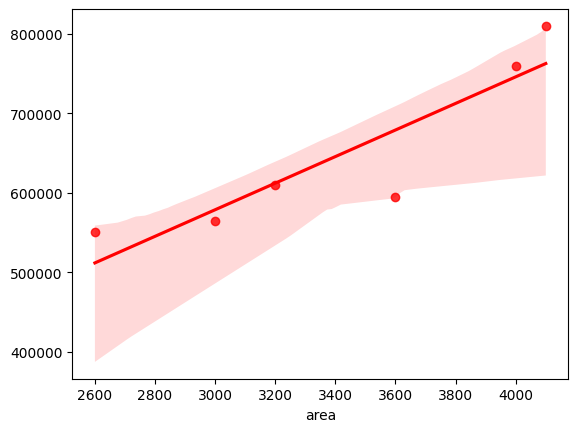

In [ ]:
import seaborn as sns
sns.regplot(x=df['area'],y=y,color='red')

<Axes: xlabel='bedrooms'>

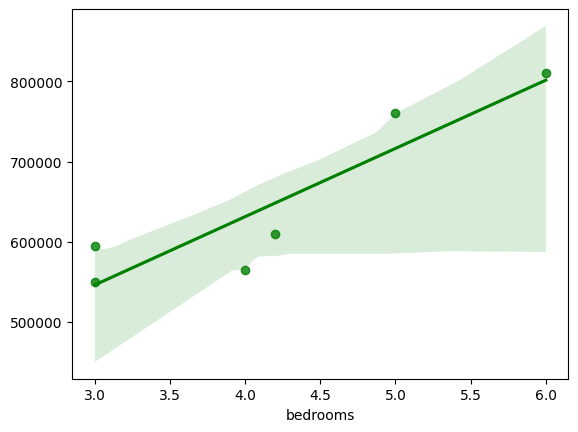

In [ ]:
sns.regplot(x=df['bedrooms'],y=y,color='green')

<Axes: xlabel='age'>

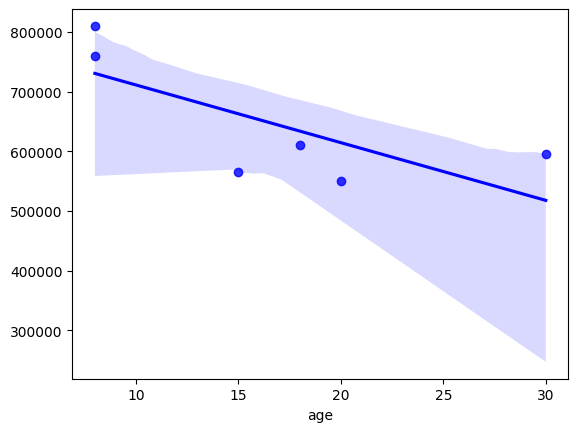

In [ ]:
sns.regplot(x=df['age'],y=y,color='blue')

In [ ]:
#Tranining and Testing data splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[4.1e+03, 6.0e+00, 8.0e+00],
       [3.2e+03, 4.2e+00, 1.8e+01],
       [4.0e+03, 5.0e+00, 8.0e+00],
       [3.6e+03, 3.0e+00, 3.0e+01]])

In [ ]:
x_test

array([[2600.,    3.,   20.],
       [3000.,    4.,   15.]])

In [ ]:
y_train

array([810000, 610000, 760000, 595000])

In [ ]:
y_test

array([550000, 565000])

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([485028.9017341 , 582355.49132948])

In [ ]:
print(model.predict([[3500,4.0,15]]))

[646300.57803468]


In [ ]:
df1=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_Value,Predicted_Value,Difference
0,550000,485028.901734,64971.098266
1,565000,582355.491329,-17355.491329


In [ ]:
print("Slope is : ",model.coef_)
print(list(zip(x,model.coef_)))

Slope is :  [  127.89017341 37210.98265896 -1791.90751445]
[(array([2600.,    3.,   20.]), 127.89017341040702), (array([3000.,    4.,   15.]), 37210.98265895953), (array([3200. ,    4.2,   18. ]), -1791.907514450868)]


In [ ]:
print("Constant is : ",model.intercept_)

Constant is :  76719.65317918186


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("Error is : ",mean_absolute_error(y_test,y_pred))
print("Error percentage is : ",mean_absolute_percentage_error(y_test,y_pred))
print("Error is : ",mean_squared_error(y_test,y_pred))
print("Error is : ",r2_score(y_test,y_pred))

Error is :  41163.294797688315
Error percentage is :  0.07442347667167439
Error is :  2261228344.5823216
Error is :  -39.19961501479683
